In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [21]:
# define constants
REBUILD_DATA = False
FIRE = "../../data/positive/"
NO_FIRE = "../../data/negative/"
LABELS = {FIRE: 1, NO_FIRE: 0}
IMAGE_SIZE = 100

def build_data_array(LABELS, IMAGE_SIZE):

    training_data = []

    # iterate over each label in our LABELS dict.
    for label in LABELS:
        
        # construct the path to the directory in which the images exist for a particular label
        path = os.path.join(os.getcwd(), label)
        
        # iterate over each file in the directory
        for photo in tqdm(os.listdir(label)):
            try:
                # construct the full path to the file
                photo_path = os.path.join(path, photo)
                
                # read and resize the image
                img = cv2.imread(photo_path)
                img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                
                # append to the training data array
                training_data.append([np.array(img), LABELS[label]])

            except Exception as e:
                pass

    # shuffle the array in place and save it to disk
    np.random.shuffle(training_data)
    np.save("data.npy", training_data)

if REBUILD_DATA:
    build_data_array(LABELS, IMAGE_SIZE)

In [22]:
data = np.load("data.npy", allow_pickle=True)

0


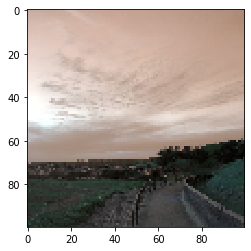

In [23]:
print(data[3][1])
plt.imshow(data[3][0])

1


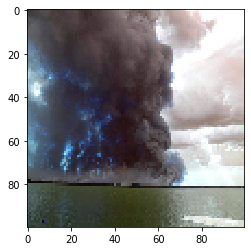

In [25]:
print(data[7][1])
plt.imshow(data[7][0])